In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

In [ ]:

diagonal = np.diagonal(pd.read_csv('/home/npapadopoulou/wat/n61_3_lr004_bs512_simple6rej8_seed8_scaled/cm/confusion_matrix_th0.5.csv', header=None, sep=',', engine='python'))

plt.plot(diagonal, marker = 'o', linestyle ='-')
plt.title('Diagonal Values of CSV')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

NameError: name 'np' is not defined

Find all trainings where all classes are >90%

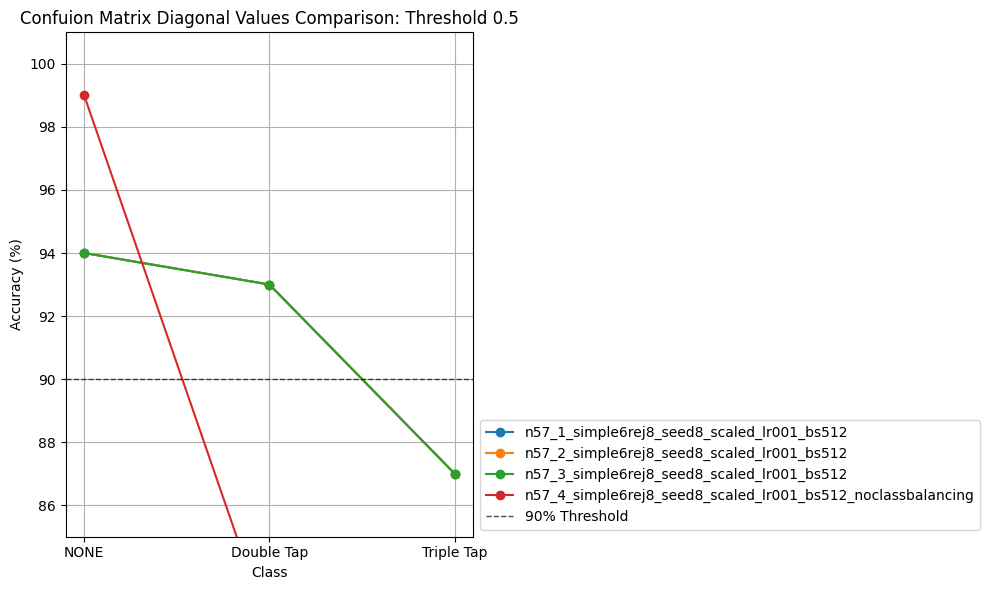

In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
base_dir = '/home/npapadopoulou/wat/'

def compare_cm(name):
    ar = name.split('_')[0]
    prefixes = [f'{ar}_{i}' for i in range(1, 10)]
    x_labels = ['NONE', 'Double Tap', 'Triple Tap']
    x_ticks = list(range(len(x_labels)))
    plt.figure(figsize=(10, 6))  # Start a single figure
    
    entries = []
    for entry in os.listdir(base_dir):
        entry_path = os.path.join(base_dir, entry)
        if not os.path.isdir(entry_path) or entry == 'logs' or not any(entry.startswith(prefix) for prefix in prefixes):
            continue 
        entries.append(entry)
    sorted_entries = sorted(entries)

    for e in sorted_entries:
        entry_path = os.path.join(base_dir, e)
        for path, dirs, files in os.walk(entry_path):
            for file in files:
                if file.endswith('confusion_matrix_th0.5.csv'):
                    csv_path = os.path.join(path, file)
                    df = pd.read_csv(csv_path, header=None, sep=',', engine='python')
                    diagonal = np.diagonal(df.values*100)
                    plt.plot((diagonal), marker='o', linestyle='-', label=e)
        
    plt.axhline(90, linestyle='--', color='black', label='90% Threshold', linewidth=1, alpha=0.7)
    plt.title('Confuion Matrix Diagonal Values Comparison: Threshold 0.5')
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.ylim(85, 101)
    plt.xticks(ticks=list(range(len(['NONE', 'Double Tap', 'Triple Tap']))), labels=['NONE', 'Double Tap', 'Triple Tap'])
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1,0), loc="lower left")
    plt.tight_layout()
    plt.show()


compare_cm('n57_')

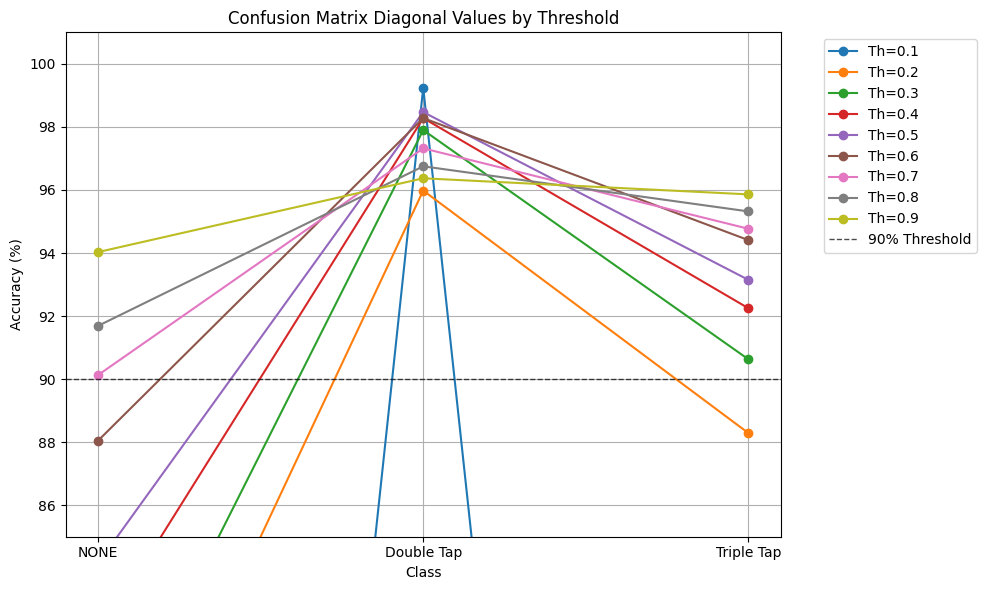

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix diagonals (accuracy %) at different thresholds (from 0.1 to 0.9)
confusion_diagonals = [
    [2.60, 99.24, 3.42],
    [74.03, 95.98, 88.29],
    [77.40, 97.90, 90.63],
    [81.82, 98.28, 92.25],
    [84.16, 98.47, 93.15],
    [88.05, 98.28, 94.41],
    [90.13, 97.32, 94.77],
    [91.69, 96.75, 95.32],
    [94.03, 96.37, 95.86]
]

thresholds = [round(i * 0.1, 1) for i in range(1, 10)]
class_labels = ['NONE', 'Double Tap', 'Triple Tap']

plt.figure(figsize=(10, 6))

# Plot each threshold's diagonal values
for i, diagonal in enumerate(confusion_diagonals):
    plt.plot(diagonal, marker='o', linestyle='-', label=f'Th={thresholds[i]}')

# Reference line
plt.axhline(90, linestyle='--', color='black', label='90% Threshold', linewidth=1, alpha=0.7)

# Plot formatting
plt.title('Confusion Matrix Diagonal Values by Threshold')
plt.xlabel('Class')
plt.ylabel('Accuracy (%)')
plt.ylim(85, 101)
plt.xticks(ticks=list(range(len(class_labels))), labels=class_labels)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data_ax = np.load('/mnt/data/data_ax.npy')
data_ay = np.load('/mnt/data/data_ay.npy')
data_az = np.load('/mnt/data/data_az.npy')
annotations = np.load('/mnt/data/annotation.npy')

# Create a time axis based on the length of the data
time = np.arange(len(data_ax))

# Plot the accelerometer data
plt.figure(figsize=(15, 6))
plt.plot(time, data_ax, label='Ax')
plt.plot(time, data_ay, label='Ay')
plt.plot(time, data_az, label='Az')

# Annotate the plot using the annotation array
for idx, label in enumerate(annotations):
    if label != 0:
        plt.axvline(x=idx, color='gray', linestyle='--', alpha=0.5)
        plt.text(idx, max(data_ax.max(), data_ay.max(), data_az.max()), 
                 str(label), rotation=90, verticalalignment='bottom', fontsize=8)

plt.title("Accelerometer Data with Annotations")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Thresholds from 0.5 to 0.9
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
class_labels = ['NONE', 'Double Tap', 'Triple Tap']
x = np.arange(len(class_labels))

# Data: 3 methods × 5 thresholds × 3 classes
frame_based = [
    [95, 93, 93],
    [95, 92, 92],
    [96, 91, 91],
    [97, 89, 89],
    [98, 84, 84],
]

event_based = [
    [84.16, 98.47, 93.15],
    [88.05, 98.28, 94.41],
    [90.13, 97.32, 94.77],
    [91.69, 96.75, 95.32],
    [94.03, 96.37, 95.86],
]

quantized_model = [
    [80.00, 91.97, 89.01],
    [84.94, 94.26, 91.53],
    [88.05, 97.32, 92.25],
    [90.39, 97.71, 93.15],
    [92.99, 96.94, 94.23],
]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

methods = {
    "Frame-based": frame_based,
    "Event-based": event_based,
    "Quantized Model": quantized_model
}
markers = ['o', 's', '^']  # Optional: different marker for each method, though not essential here

for ax, (title, data) in zip(axs, methods.items()):
    for i, values in enumerate(data):
        ax.plot(x, values, marker='o', linestyle='-', label=f'Th={thresholds[i]}')
    ax.axhline(90, linestyle='--', color='black', linewidth=1, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Class')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels)
    ax.grid(True)
    if ax == axs[0]:
        ax.set_ylabel('Accuracy (%)')
    ax.set_ylim(80, 101)
    ax.legend(fontsize='small')

plt.suptitle('Confusion Matrix Diagonal Accuracy per Evaluation Type and Threshold', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [31]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import pandas as pd

class ConfusionMatrix:
    def __init__(self,name, label_list, labels):
        self.name = name
        self.label_list = label_list
        self.labels = labels
        self.base_path = f"/home/npapadopoulou/wat/outputs/{name}/cm"
        os.makedirs(self.base_path, exist_ok=True)

    def compute_cm(self, threshold):
        y_pred_probs = np.load(f"/home/npapadopoulou/wat/outputs/eval_mltools/{self.name}/y_pred.npy")
        y_test = np.load(f"/home/npapadopoulou/wat/outputs/eval_mltools/{self.name}/y_test.npy")

        y_pred = np.argmax(y_pred_probs, axis=-1)  #(N, 1600)
        y_pred_max_probs = np.max(y_pred_probs, axis=-1)    
        y_pred = np.where(y_pred_max_probs >= threshold, y_pred, 0) # Where the model is NOT confident enough, I will put it as "NONE"

        y_pred_flat = y_pred.flatten()  #
        y_test_flat = y_test.flatten()

        cm = confusion_matrix(y_test_flat, y_pred_flat, labels=self.labels, normalize= 'true')
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.label_list)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix at Threshold {threshold}")
        plt.savefig(os.path.join(self.base_path,f"confusion_matrix_th{threshold}.png"))

        return cm

    # Callable fcn
    def get_cm(self): 
        thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
        for t in thresholds: 
            the_cm = self.compute_cm(t)
            return pd.DataFrame(the_cm, index=self.label_list, columns=self.label_list).to_csv((os.path.join(self.base_path,f"confusion_matrix_th{t}.csv")),float_format='%.2f',index=False, header=False)
    


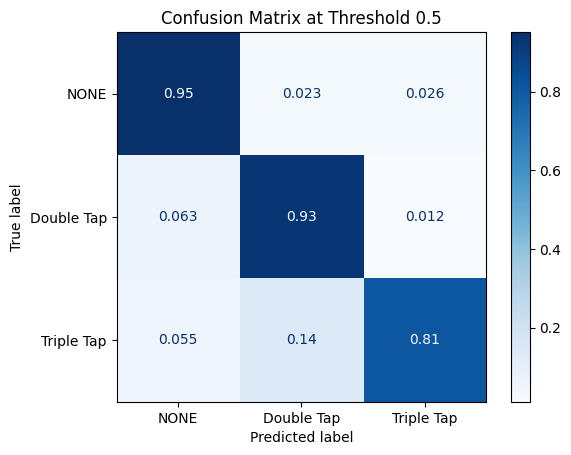

In [32]:
label_list = ['NONE', 'Double Tap', 'Triple Tap']
labels = [0, 1, 2]

cm = ConfusionMatrix(name="z5_5_he_simple6_rej8_0.01_512_10000", label_list=label_list, labels=labels)
cm.get_cm()
